In [3]:
#json api

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [4]:
#imortng dataset directly from kaggle

!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 24.3MB/s]
100% 1.06G/1.06G [00:49<00:00, 22.9MB/s]


In [6]:
#unzip File

import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
#importing Tensorflow & Keras

import tensorflow as tf
from tensorflow import keras

#import layers from Keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [15]:
# generators
#train dataset
train_ds=tf.keras.utils.image_dataset_from_directory(
      directory = '/content/train',
      labels = 'inferred',     #labels are generated from the directory structure)
      label_mode='int',        #cat =1, dog=0
      batch_size=32,
      image_size=(256,256)
)
#validation dataset
val_ds=tf.keras.utils.image_dataset_from_directory(
      directory = '/content/test',
      labels = 'inferred',     #labels are generated from the directory structure)
      label_mode='int',        #cat =1, dog=0
      batch_size=32,
      image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [16]:
#normalize to get pixel values ffrom 0 to 1, previously it is upto 256 as in numpy

def process(image, label):
  image =tf.cast(image/255 , tf.float32)
  return image,label


train_ds = train_ds.map(process)
val_ds   = val_ds.map(process)

In [23]:
#Building Model

model = Sequential()

#Convlution , maxpooling layers
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))

model.add( Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add( MaxPooling2D (pool_size=(2,2), strides=2, padding="valid"))

#flatten layer
model.add(Flatten())

#Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )

In [27]:
history= model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
625/625 [==============================] - 65s 84ms/step - loss: 0.6324 - accuracy: 0.6364 - val_loss: 0.5694 - val_accuracy: 0.6886
Epoch 2/10
625/625 [==============================] - 54s 85ms/step - loss: 0.4908 - accuracy: 0.7617 - val_loss: 0.4836 - val_accuracy: 0.7630
Epoch 3/10
625/625 [==============================] - 55s 88ms/step - loss: 0.3972 - accuracy: 0.8178 - val_loss: 0.4960 - val_accuracy: 0.7742
Epoch 4/10
625/625 [==============================] - 53s 83ms/step - loss: 0.2839 - accuracy: 0.8752 - val_loss: 0.5650 - val_accuracy: 0.7840
Epoch 5/10
625/625 [==============================] - 52s 82ms/step - loss: 0.1694 - accuracy: 0.9308 - val_loss: 0.8229 - val_accuracy: 0.7798
Epoch 6/10
625/625 [==============================] - 54s 87ms/step - loss: 0.1129 - accuracy: 0.9570 - val_loss: 0.9191 - val_accuracy: 0.7704
Epoch 7/10
625/625 [==============================] - 54s 85ms/step - loss: 0.0777 - accuracy: 0.9736 - val_loss: 1.0429 - val_accuracy:

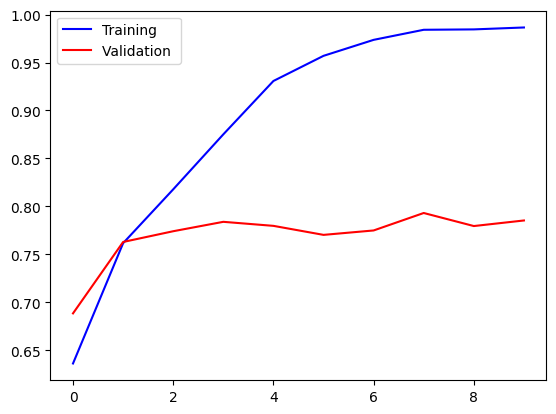

In [30]:
#plotting graph

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='blue', label='Training ')
plt.plot(history.history['val_accuracy'], color='red', label='Validation ')
plt.legend()
plt.show()

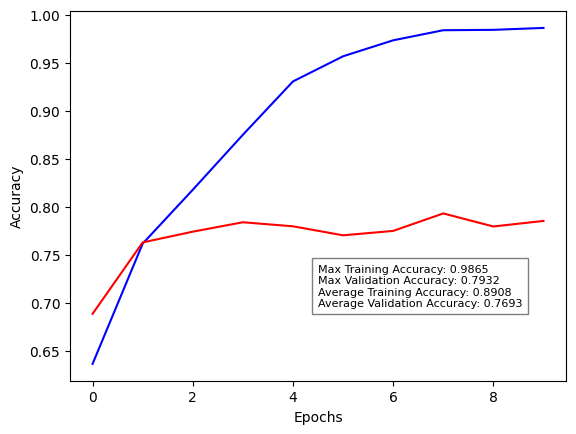

In [45]:
import matplotlib.pyplot as plt


# Plot training accuracy
plt.plot(history.history['accuracy'], color='blue', label='Training Accuracy')

# Plot validation accuracy
plt.plot(history.history['val_accuracy'], color='red', label='Validation Accuracy')

# Add labels and withoutlegend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.legend()

# Calculate and display summary statistics
train_max_accuracy = max(history.history['accuracy'])
val_max_accuracy = max(history.history['val_accuracy'])
train_avg_accuracy = sum(history.history['accuracy']) / len(history.history['accuracy'])
val_avg_accuracy = sum(history.history['val_accuracy']) / len(history.history['val_accuracy'])

summary_text = (
    f"Max Training Accuracy: {train_max_accuracy:.4f}\n"
    f"Max Validation Accuracy: {val_max_accuracy:.4f}\n"
    f"Average Training Accuracy: {train_avg_accuracy:.4f}\n"
    f"Average Validation Accuracy: {val_avg_accuracy:.4f}"
)

# Add the summary text to the plot
plt.text(0.5, 0.2, summary_text, transform=plt.gca().transAxes, fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

# Show the plot
plt.show()


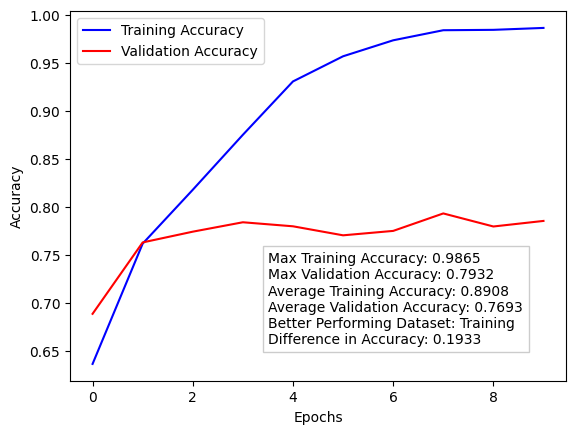

In [44]:
import matplotlib.pyplot as plt

# Assuming you have a 'history' object with 'accuracy' and 'val_accuracy' data

# Plot training accuracy
plt.plot(history.history['accuracy'], color='blue', label='Training Accuracy')

# Plot validation accuracy
plt.plot(history.history['val_accuracy'], color='red', label='Validation Accuracy')

# Add labels & legends
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Calculate and display summary statistics
train_max_accuracy = max(history.history['accuracy'])
val_max_accuracy = max(history.history['val_accuracy'])
train_avg_accuracy = sum(history.history['accuracy']) / len(history.history['accuracy'])
val_avg_accuracy = sum(history.history['val_accuracy']) / len(history.history['val_accuracy'])

# Determine which dataset is performing better
performance_summary = "Validation" if val_max_accuracy > train_max_accuracy else "Training"
performance_difference = abs(val_max_accuracy - train_max_accuracy)

summary_text = (
    f"Max Training Accuracy: {train_max_accuracy:.4f}\n"
    f"Max Validation Accuracy: {val_max_accuracy:.4f}\n"
    f"Average Training Accuracy: {train_avg_accuracy:.4f}\n"
    f"Average Validation Accuracy: {val_avg_accuracy:.4f}\n"
    f"Better Performing Dataset: {performance_summary}\n"
    f"Difference in Accuracy: {performance_difference:.4f}"
)

# Add the summary text to the plot
plt.text(0.4, 0.1, summary_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.20))

# Show the plot
plt.show()



**Overfitting**

train high acc = low bias

test low acc = high variance


**Underfitting**

 train low = high  Bias

 test low = high Vairance


**Ideal Case**

low Bias

low Variance

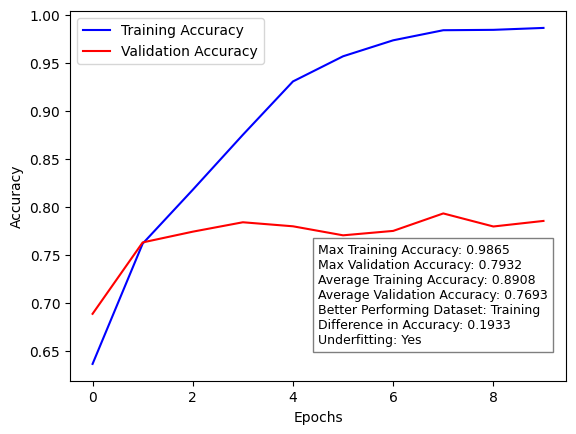

In [54]:
import matplotlib.pyplot as plt

# Assuming you have a 'history' object with 'accuracy' and 'val_accuracy' data

# Plot training accuracy
plt.plot(history.history['accuracy'], color='blue', label='Training Accuracy')

# Plot validation accuracy
plt.plot(history.history['val_accuracy'], color='red', label='Validation Accuracy')

# Add labels (but no legend)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Calculate and display summary statistics
train_max_accuracy = max(history.history['accuracy'])
val_max_accuracy = max(history.history['val_accuracy'])
train_avg_accuracy = sum(history.history['accuracy']) / len(history.history['accuracy'])
val_avg_accuracy = sum(history.history['val_accuracy']) / len(history.history['val_accuracy'])

# Determine which dataset is performing better
performance_summary = "Validation" if val_max_accuracy > train_max_accuracy else "Training"
performance_difference = abs(val_max_accuracy - train_max_accuracy)

# Check for underfitting
underfitting = "Yes" if val_max_accuracy < 0.9 else "No"

summary_text = (
    f"Max Training Accuracy: {train_max_accuracy:.4f}\n"
    f"Max Validation Accuracy: {val_max_accuracy:.4f}\n"
    f"Average Training Accuracy: {train_avg_accuracy:.4f}\n"
    f"Average Validation Accuracy: {val_avg_accuracy:.4f}\n"
    f"Better Performing Dataset: {performance_summary}\n"
    f"Difference in Accuracy: {performance_difference:.4f}\n"
    f"Underfitting: {underfitting}"
)

# Add the summary text to the plot
plt.text(0.5, 0.1, summary_text, transform=plt.gca().transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))

# Show the plot
plt.show()


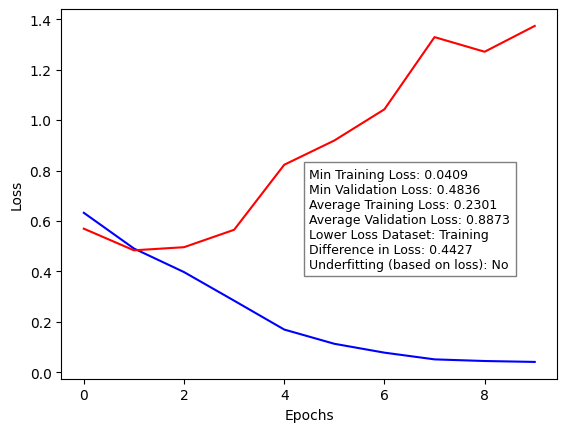

In [61]:
import matplotlib.pyplot as plt

# Assuming you have a 'history' object with 'loss' and 'val_loss' data

# Plot training loss
plt.plot(history.history['loss'], color='blue', label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], color='red', label='Validation Loss')

# Add labels (but no legend)
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Calculate and display summary statistics for loss
train_min_loss = min(history.history['loss'])
val_min_loss = min(history.history['val_loss'])
train_avg_loss = sum(history.history['loss']) / len(history.history['loss'])
val_avg_loss = sum(history.history['val_loss']) / len(history.history['val_loss'])

# Determine which dataset has lower loss
loss_summary = "Validation" if val_min_loss < train_min_loss else "Training"
loss_difference = abs(val_min_loss - train_min_loss)

# Check for underfitting based on loss
underfitting_loss = "Yes" if val_min_loss > 0.5 else "No"

loss_summary_text = (
    f"Min Training Loss: {train_min_loss:.4f}\n"
    f"Min Validation Loss: {val_min_loss:.4f}\n"
    f"Average Training Loss: {train_avg_loss:.4f}\n"
    f"Average Validation Loss: {val_avg_loss:.4f}\n"
    f"Lower Loss Dataset: {loss_summary}\n"
    f"Difference in Loss: {loss_difference:.4f}\n"
    f"Underfitting (based on loss): {underfitting_loss}"
)

# Add the loss summary text to the plot
plt.text(0.5, 0.3, loss_summary_text, transform=plt.gca().transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))

# Show the loss plot
plt.show()


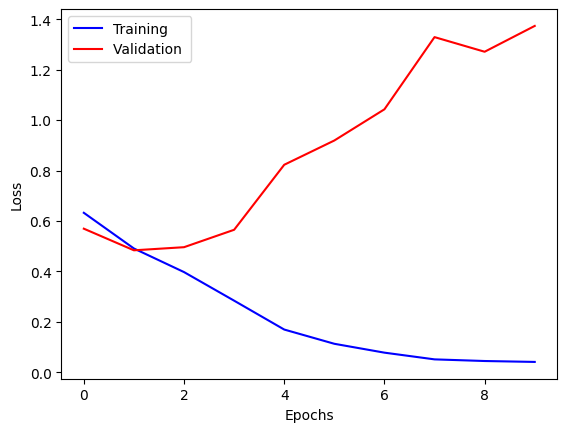

In [62]:
#plotting graph

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='blue', label='Training ')
plt.plot(history.history['val_loss'], color='red', label='Validation ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Clearly an underfitting Problem
So we will apply
# Droput & BatchNormalization

In [63]:
#importing Tensorflow & Keras

import tensorflow as tf
from tensorflow import keras

#import layers from Keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

# Adding Layers

In [65]:
from keras.src.layers.normalization import batch_normalization
#Building Model

model = Sequential()

#Convolution Layers
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))

model.add( Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add( MaxPooling2D (pool_size=(2,2), strides=2, padding="valid"))

#flatten layer
model.add(Flatten())

#Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [66]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [67]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )

In [74]:
history1 = model.fit(train_ds, epochs=10, validation_data= val_ds)

Epoch 1/10
625/625 [==============================] - 70s 103ms/step - loss: 1.1611 - accuracy: 0.5983 - val_loss: 0.5788 - val_accuracy: 0.7038
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5553 - accuracy: 0.7298 - val_loss: 0.5382 - val_accuracy: 0.7430
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4730 - accuracy: 0.7755 - val_loss: 0.7059 - val_accuracy: 0.6980
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4074 - accuracy: 0.8134 - val_loss: 0.5305 - val_accuracy: 0.7286
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3382 - accuracy: 0.8518 - val_loss: 0.4566 - val_accuracy: 0.7854
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2660 - accuracy: 0.8863 - val_loss: 0.4531 - val_accuracy: 0.8140
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.1856 - accuracy: 0.9239 - val_loss: 1.1669 - val_ac

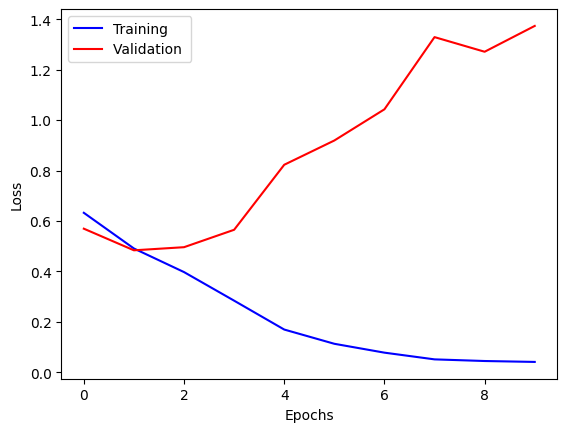

In [75]:
#plotting graph

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='blue', label='Training ')
plt.plot(history.history['val_loss'], color='red', label='Validation ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

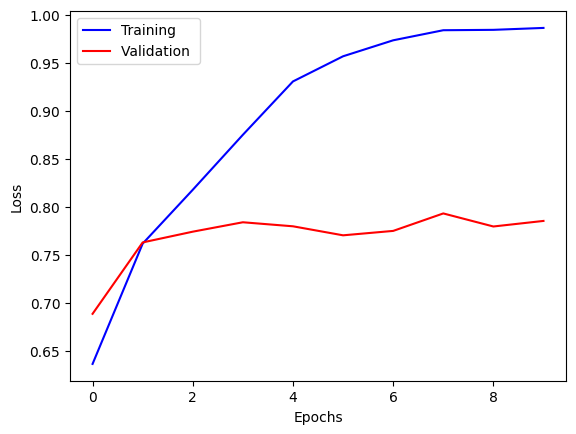

In [76]:
#plotting graph

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='blue', label='Training ')
plt.plot(history.history['val_accuracy'], color='red', label='Validation ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()